
# Lektion 4 - Scikit-learn API (Del 1)
## Assignment: Classification and regression with a common API

Instructions:
1. Use scikit-learn estimators and the .fit/.predict pattern
2. Compare models on the same dataset
3. Add short comments explaining results


In [1]:
# TODO: Load a dataset (iris, breast_cancer, or diabetes)
from sklearn.datasets import load_iris, load_diabetes 

data = load_iris()

X = data.data
y = data.target
target_names = data.target_names

print("X: ", X)
print("y: ", y)

X:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

In [2]:
# TODO: Create train/test split with a fixed random_state

# Here we often use a function (train_test_split)
# the function splits our data neatly into piles of train and test
# We could do this manually
from sklearn.model_selection import train_test_split
# Test_size intentionally set to bad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.89, random_state=42
    )


In [3]:
print(X_train.shape, X_test.shape)

(16, 4) (134, 4)


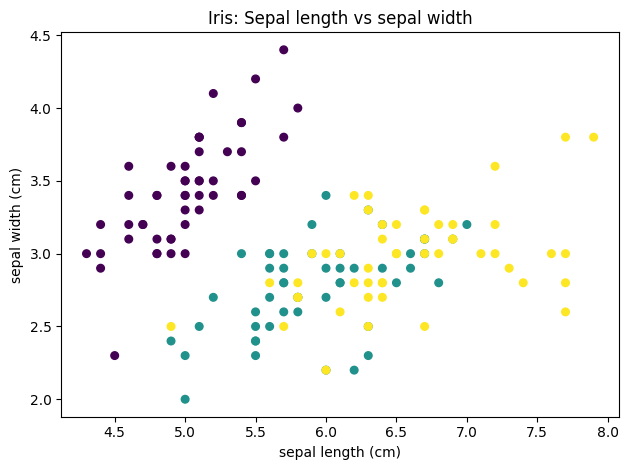

In [4]:
import matplotlib.pyplot as plt

# Med plt.plot() kan vi plotta data
# plot() tar data på listform, som kan skicka in på
# olika sätt

# Med plt.plot() plottar vi ett linjediagram
# Linjediagramet har jättemånga inställningar 
# De kan ni gräva i när ni behöver plotta
# "o":et är ett exempel på en inställning
# Den gör att vi plottar punkter istället för linjer

#plt.plot(X,y, 'o')


# Vår data är högdimensionell (4 dimensioner), 
# Så vi väljer att plotta två dimensioner
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30)

X[:23]

plt.title("Iris: Sepal length vs sepal width")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.tight_layout()
plt.show()

## Task 2: Two models, same API

#### TODO: Train LogisticRegression (classification) OR LinearRegression (regression)


In [5]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# Först skapar vi en helt tom modell
LogReg = LogisticRegression(max_iter=100)

# Sen anpassar vi den till vår data
# Vi tränar den: den försöker hitta samband
# mellan vårt X (features) och y (target)
LogReg.fit(X_train, y_train)

# Vi utvärderar vår modell med testdata
y_pred = LogReg.predict(X_test)



Vår accuracy är: 0.9477611940298507
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.84      0.91        44
           2       0.86      1.00      0.92        43

    accuracy                           0.95       134
   macro avg       0.95      0.95      0.95       134
weighted avg       0.96      0.95      0.95       134



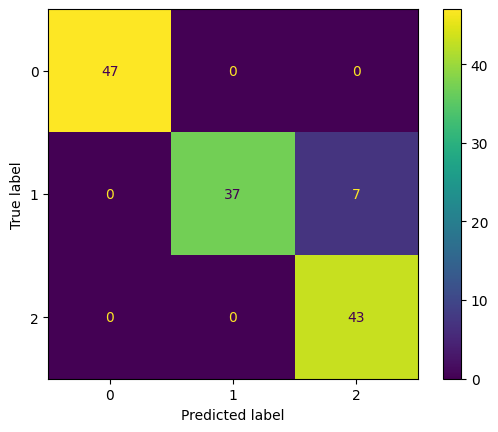

In [6]:
# Vi utvärderar vår modell genom att jämföra predictions mot faktiska värden
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Vår accuracy är:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix2 =confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix2).plot()


#### TODO: Train SVC (classification) OR Ridge (regression)


Vår accuracy är: 0.9253731343283582
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      0.77      0.87        44
           2       0.81      1.00      0.90        43

    accuracy                           0.93       134
   macro avg       0.94      0.92      0.92       134
weighted avg       0.94      0.93      0.92       134



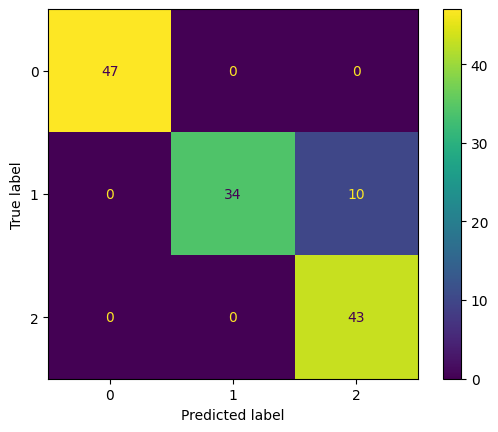

In [7]:
# We create one extra classification model to compare models
# In ML this is very usual and almost neccessary 
# We train models with same purpose, then compare 
from sklearn.svm import SVC

svc = SVC()

# Same steps as above(LogReg)
svc.fit(X_train, y_train)
y_pred_svc=svc.predict(X_test)

print("Vår accuracy är:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

confusion_matrix3 =confusion_matrix(y_test, y_pred_svc)
ConfusionMatrixDisplay(confusion_matrix3).plot()


In [9]:
# How to loop thorugh different models. Often used in production
# Standard way of training several models 
log_reg = LogisticRegression(max_iter=1000)
svm_mod = SVC()

print("\nClassification models on Iris")
for model in [log_reg, svm_mod]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"--- {model.__class__.__name__} ---")
    # Macro-average treats each class equally (good for multiclass)
    print(f"F1 Score (macro): {f1_score(y_test, preds, average='macro'):.4f}")


Classification models on Iris
--- LogisticRegression ---
F1 Score (macro): 0.9461
--- SVC ---
F1 Score (macro): 0.9225


## Task 3: Regression Continuation

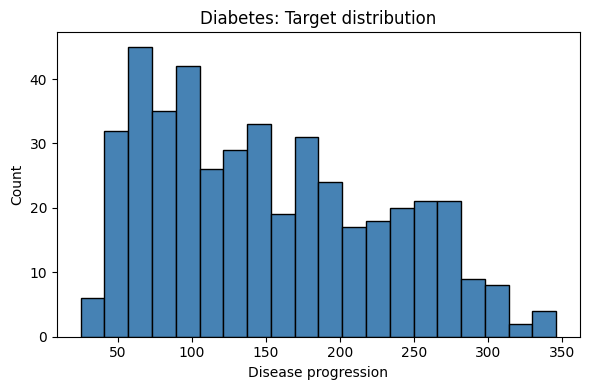

In [10]:
# PREP: Doing the same as above, but for another dataset

# Regression dataset: Diabetes
diabetes = load_diabetes()
X_reg = diabetes.data
y_reg = diabetes.target

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Diabetes: histogram of target values
plt.figure(figsize=(6, 4))
plt.hist(y_reg, bins=20, color="steelblue", edgecolor="black")
plt.title("Diabetes: Target distribution")
plt.xlabel("Disease progression")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [13]:
# Now we train Regression model on this data
# We will try to predict disease progression for diabetes patients

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error

LinReg = LinearRegression()
ridge = Ridge() # we could add alfa and a solver here

y_reg_pred = []

for model in [LinReg, ridge]:
    model.fit(X_reg_train, y_reg_train) 
    # To save values from traning for more analysis (as below)
    # very useful
    y_reg_pred.append(model.predict(X_reg_test))

    y_pred = model.predict(X_reg_test)
    print(f"--- {model.__class__.__name__} ---")
    print("Mean absolute error:", mean_absolute_error(y_reg_test, y_pred))
    print("R2 score:", r2_score(y_reg_test, y_pred))

y_reg_pred


--- LinearRegression ---
Mean absolute error: 42.794094679599944
R2 score: 0.45260276297191926
--- Ridge ---
Mean absolute error: 46.138857666974516
R2 score: 0.41915292635986545


[array([139.5475584 , 179.51720835, 134.03875572, 291.41702925,
        123.78965872,  92.1723465 , 258.23238899, 181.33732057,
         90.22411311, 108.63375858,  94.13865744, 168.43486358,
         53.5047888 , 206.63081659, 100.12925869, 130.66657085,
        219.53071499, 250.7803234 , 196.3688346 , 218.57511815,
        207.35050182,  88.48340941,  70.43285917, 188.95914235,
        154.8868162 , 159.36170122, 188.31263363, 180.39094033,
         47.99046561, 108.97453871, 174.77897633,  86.36406656,
        132.95761215, 184.53819483, 173.83220911, 190.35858492,
        124.4156176 , 119.65110656, 147.95168682,  59.05405241,
         71.62331856, 107.68284704, 165.45365458, 155.00975931,
        171.04799096,  61.45761356,  71.66672581, 114.96732206,
         51.57975523, 167.57599528, 152.52291955,  62.95568515,
        103.49741722, 109.20751489, 175.64118426, 154.60296242,
         94.41704366, 210.74209145, 120.2566205 ,  77.61585399,
        187.93203995, 206.49337474, 140.